 Team Assignment #4 - Data Exploration  
 Author: Matana Pornluanprasert
 23 Sep 2024

 Data Source: 
 Welltory COVID-19 and Wearables Open Data
 https://github.com/Welltory/hrv-covid19/tree/master

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3

# Read the csv file and put it into pandas dataframe
try:
    # Load participants' generic personal data into dataframe
    df_participants = pd.read_csv("https://raw.githubusercontent.com/Welltory/hrv-covid19/master/data/participants.csv")

    # Load participants' biometrics data into dataframe
    df_blood_pressure = pd.read_csv("https://raw.githubusercontent.com/Welltory/hrv-covid19/master/data/blood_pressure.csv")
    df_heart_rate = pd.read_csv("https://raw.githubusercontent.com/Welltory/hrv-covid19/master/data/heart_rate.csv")
    df_hrv_measurements = pd.read_csv("https://raw.githubusercontent.com/Welltory/hrv-covid19/master/data/hrv_measurements.csv")
    df_sleep = pd.read_csv("https://raw.githubusercontent.com/Welltory/hrv-covid19/master/data/sleep.csv")
    df_wearables = pd.read_csv("https://raw.githubusercontent.com/Welltory/hrv-covid19/master/data/wearables.csv")

    # Load weather condition data into dataframe
    df_weather = pd.read_csv("https://raw.githubusercontent.com/Welltory/hrv-covid19/master/data/weather.csv")

    # Load participants' survey and corresponding scale description into dataframe
    df_surveys = pd.read_csv("https://raw.githubusercontent.com/Welltory/hrv-covid19/master/data/surveys.csv")
    df_scales_description = pd.read_csv("https://raw.githubusercontent.com/Welltory/hrv-covid19/master/data/scales_description.csv")

except Exception as err:
        print(f"Error occurred: {err}")

In [18]:
# Perform simple transformation for Survey and Scale Description: Merge df_surveys and df_scales_description, with left join (retain all rows of df_surveys) to get "Description" and "Meaning" in single dataframe (df_scales_description)
df_surveys["scale_value"] = df_surveys["value"].apply(str) 
df_surveys["scale_value"] = df_surveys["scale"] + df_surveys["scale_value"] # Create new column "scale_value" from existing two columns "scale" and "value"

df_scales_description["scale_value"] = df_scales_description["Value"].apply(str)
df_scales_description["scale_value"] = df_scales_description["Scale"] + df_scales_description["scale_value"] # Create new column "scale_value" from existing two columns "Scale" and "Value"

df_surveys_merged = df_surveys.merge(df_scales_description[["scale_value", "Description", "Meaning"]], on = "scale_value", how = "left") # Left join the two dataframe on column "scale_value"

1. Document data context and data sampling in markdown

In [19]:
# Data Sampling
print("Data Sampling")
print("---------------")

print("\nParticipants' Generic Personal Data")
print(df_participants.sample(n=5))

print("\nParticipants' Biometrics Data: Blood Pressure")
print(df_blood_pressure.sample(n=5))

print("\nParticipants' Biometrics Data: Heart Rate")
print(df_heart_rate.sample(n=5))

print("\nParticipants' Biometrics Data: Heart Rate Variability (HRV) Measurements")
print(df_hrv_measurements.sample(n=5))

print("\nParticipants' Biometrics Data: Sleep Data")
print(df_sleep.sample(n=5))

print("\nParticipants' Biometrics Data: Wearables Data")
print(df_wearables.sample(n=5))

print("\nWeather Condition Data for Participants' Locations")
print(df_weather.sample(n=5))

print("\nParticipants' Survey Data (Original Table with one additional column: scale_value)")
print(df_surveys.sample(n=5))

print("\nScale Description for Survey (Original Table with one additional column: scale_value)")
print(df_scales_description.sample(n=5))

print("\nParticipants' Survey Data (merged with Scale Description)")
print(df_surveys_merged.sample(n=5))

Data Sampling
---------------

Participants' Generic Personal Data
     user_code gender age_range         city country  height  weight  \
53  43e1055eb8      f     35-44  Makhachkala  Russia   171.0    74.0   
87  71980b2daf      f     35-44       Moscow  Russia   159.0    43.5   
60  4da9d39406      m     18-24  João Pessoa  Brazil   170.0    83.9   
19  19021f3a0a      m     25-34       Samara  Russia   173.0    65.6   
1   013f6d3e5b      f     18-24    São Paulo  Brazil   174.0    77.3   

   symptoms_onset  
53      5/10/2020  
87            NaN  
60       5/4/2020  
19      3/13/2020  
1       5/15/2020  

Participants' Biometrics Data: Blood Pressure
      user_code  measurement_datetime  diastolic  systolic  \
652  fde84801d8  2020-05-03  12:57:58         78       109   
574  cf7e50bcde  2020-05-05  04:54:33         62        97   
270  a1c2e6b2eb  2020-03-22  04:57:57         91       126   
673  fde84801d8  2020-05-10  14:18:47         87       119   
716  fde84801d8  2020-0

Data Context

This Covid-19 and wearables data was collected in 2020 by Welltory team from participants with positive Covid-19. It comprises of health conditions of participants, including blood pressure, heart rate, HRV measurement, sleep data, wearables data, survey of symptoms, plus weather condition and participants' generic personal data. The team uses multiple devices for data collection, such as bluetooth-enabled heart rate monitor, smart phone camera, Apple Watch, and Garmin.

2. Explore and interpret data structure, descriptive statistics, data quality, and variable relationships

In [20]:
# Data Structure
print("\nData Structure")
print("---------------")

print("\nParticipants' Generic Personal Data")
print(f"Dimensions: {df_participants.shape}")
print(f"Data Types:\n{df_participants.dtypes}")
print(f"Missing Values:\n{df_participants.isnull().sum()}")

print("\nParticipants' Biometrics Data: Blood Pressure")
print(f"Dimensions: {df_blood_pressure.shape}")
print(f"Data Types:\n{df_blood_pressure.dtypes}")
print(f"Missing Values:\n{df_blood_pressure.isnull().sum()}")

print("\nParticipants' Biometrics Data: Heart Rate")
print(f"Dimensions: {df_heart_rate.shape}")
print(f"Data Types:\n{df_heart_rate.dtypes}")
print(f"Missing Values:\n{df_heart_rate.isnull().sum()}")

print("\nParticipants' Biometrics Data: Heart Rate Variability (HRV) Measurements")
print(f"Dimensions: {df_hrv_measurements.shape}")
print(f"Data Types:\n{df_hrv_measurements.dtypes}")
print(f"Missing Values:\n{df_hrv_measurements.isnull().sum()}")

print("\nParticipants' Biometrics Data: Sleep Data")
print(f"Dimensions: {df_sleep.shape}")
print(f"Data Types:\n{df_sleep.dtypes}")
print(f"Missing Values:\n{df_sleep.isnull().sum()}")

print("\nParticipants' Biometrics Data: Wearables Data")
print(f"Dimensions: {df_wearables.shape}")
print(f"Data Types:\n{df_wearables.dtypes}")
print(f"Missing Values:\n{df_wearables.isnull().sum()}")

print("\nWeather Condition Data for Participants' Locations")
print(f"Dimensions: {df_weather.shape}")
print(f"Data Types:\n{df_weather.dtypes}")
print(f"Missing Values:\n{df_weather.isnull().sum()}")

print("\nParticipants' Survey Data (Original Table)")
print(f"Dimensions: {df_surveys.shape}")
print(f"Data Types:\n{df_surveys.dtypes}")
print(f"Missing Values:\n{df_surveys.isnull().sum()}")

print("\nScale Description for Survey")
print(f"Dimensions: {df_scales_description.shape}")
print(f"Data Types:\n{df_scales_description.dtypes}")
print(f"Missing Values:\n{df_scales_description.isnull().sum()}")

print("\nParticipants' Survey Data (merged with Scale Description)")
print(f"Dimensions: {df_surveys_merged.shape}")
print(f"Data Types:\n{df_surveys_merged.dtypes}")
print(f"Missing Values:\n{df_surveys_merged.isnull().sum()}")


Data Structure
---------------

Participants' Generic Personal Data
Dimensions: (185, 8)
Data Types:
user_code          object
gender             object
age_range          object
city               object
country            object
height            float64
weight            float64
symptoms_onset     object
dtype: object
Missing Values:
user_code          0
gender             0
age_range          0
city              12
country            6
height             2
weight             0
symptoms_onset    38
dtype: int64

Participants' Biometrics Data: Blood Pressure
Dimensions: (721, 8)
Data Types:
user_code                    object
measurement_datetime         object
diastolic                     int64
systolic                      int64
functional_changes_index    float64
circulatory_efficiency      float64
kerdo_vegetation_index      float64
robinson_index              float64
dtype: object
Missing Values:
user_code                     0
measurement_datetime          0
diastolic        

Interpretation of Data Structure

There are 185 patients with positive Covid-19 participating in this research, each with unique user_code assigned. Personal data [gender, age range, city, country, height (float), weight (float), and symptoms onset] are collected; however some personal data (city, country, height, and symtoms onset) are missing.

Participants' biometric data [blood pressure, heart rate, HRV measurements, sleep data, wearables data] are mostly numeric, either in float or integer, except for some tags which are string. These are collected for each participant (user_code) and day/time of measurement or recording. While multiple biometric data are complete (no missing), there are some missings in:

- Blood Pressure: functional_changes_index, circulatory_efficiency, kerdo_vegetation_index, robinson_index 

- HRV Measurements: how_sleep, tags 

- Sleep Data: sleep_awake_duration, sleep_rem_duration, sleep_light_duration, sleep_deep_duration, pulse_min, pulse_max, pulse_average

- Wearables Data: all columns except user_code and day

Weather Data contains weather conditions (temperature, atmospheric pressure, precipitation, humidity, and clouds, all in float) for participants' location in certain days. This data is complete and no missing.

Survey Data are health-related survey results collected from Welltory app. Each scale are recorded in integer, with corresponding scale description, meaning, and text interpretation of user's results. These are collected for each participant (user_code) and date of survey taken.

In [25]:
# Descriptive Statistics
print("\nDescriptive Statistics")
print("----------------------")

print("\nParticipants' Generic Personal Data")
print("----------------------")
numeric_columns1 = df_participants.select_dtypes(include=[np.number]).columns
print("Central Tendency Measures:")
print(df_participants[numeric_columns1].describe().loc[['mean', '50%']])
print("\nDispersion Measures:")
print(df_participants[numeric_columns1].describe().loc[['std', 'min', 'max']])
print("\nDistribution Measures:")
print("Skewness:")
print(df_participants[numeric_columns1].skew())
print("Kurtosis:")
print(df_participants[numeric_columns1].kurt())

print("\nParticipants' Biometrics Data: Blood Pressure")
print("----------------------")
numeric_columns2 = df_blood_pressure.select_dtypes(include=[np.number]).columns
print("Central Tendency Measures:")
print(df_blood_pressure[numeric_columns2].describe().loc[['mean', '50%']])
print("\nDispersion Measures:")
print(df_blood_pressure[numeric_columns2].describe().loc[['std', 'min', 'max']])
print("\nDistribution Measures:")
print("Skewness:")
print(df_blood_pressure[numeric_columns2].skew())
print("Kurtosis:")
print(df_blood_pressure[numeric_columns2].kurt())

print("\nParticipants' Biometrics Data: Heart Rate")
print("----------------------")
numeric_columns3 = df_heart_rate.select_dtypes(include=[np.number]).columns
print("Central Tendency Measures:")
print(df_heart_rate[numeric_columns3].describe().loc[['mean', '50%']])
print("\nDispersion Measures:")
print(df_heart_rate[numeric_columns3].describe().loc[['std', 'min', 'max']])
print("\nDistribution Measures:")
print("Skewness:")
print(df_heart_rate[numeric_columns3].skew())
print("Kurtosis:")
print(df_heart_rate[numeric_columns3].kurt())

print("\nParticipants' Biometrics Data: Heart Rate Variability (HRV) Measurements")
print("----------------------")
numeric_columns4 = df_hrv_measurements.select_dtypes(include=[np.number]).columns
print("Central Tendency Measures:")
print(df_hrv_measurements[numeric_columns4].describe().loc[['mean', '50%']])
print("\nDispersion Measures:")
print(df_hrv_measurements[numeric_columns4].describe().loc[['std', 'min', 'max']])
print("\nDistribution Measures:")
print("Skewness:")
print(df_hrv_measurements[numeric_columns4].skew())
print("Kurtosis:")
print(df_hrv_measurements[numeric_columns4].kurt())

print("\nParticipants' Biometrics Data: Sleep Data")
print("----------------------")
numeric_columns5 = df_sleep.select_dtypes(include=[np.number]).columns
print("Central Tendency Measures:")
print(df_sleep[numeric_columns5].describe().loc[['mean', '50%']])
print("\nDispersion Measures:")
print(df_sleep[numeric_columns5].describe().loc[['std', 'min', 'max']])
print("\nDistribution Measures:")
print("Skewness:")
print(df_sleep[numeric_columns5].skew())
print("Kurtosis:")
print(df_sleep[numeric_columns5].kurt())

print("\nParticipants' Biometrics Data: Wearables Data")
print("----------------------")
numeric_columns6 = df_wearables.select_dtypes(include=[np.number]).columns
print("Central Tendency Measures:")
print(df_wearables[numeric_columns6].describe().loc[['mean', '50%']])
print("\nDispersion Measures:")
print(df_wearables[numeric_columns6].describe().loc[['std', 'min', 'max']])
print("\nDistribution Measures:")
print("Skewness:")
print(df_wearables[numeric_columns6].skew())
print("Kurtosis:")
print(df_wearables[numeric_columns6].kurt())

print("\nWeather Condition Data for Participants' Locations")
print("----------------------")
numeric_columns7 = df_weather.select_dtypes(include=[np.number]).columns
print("Central Tendency Measures:")
print(df_weather[numeric_columns7].describe().loc[['mean', '50%']])
print("\nDispersion Measures:")
print(df_weather[numeric_columns7].describe().loc[['std', 'min', 'max']])
print("\nDistribution Measures:")
print("Skewness:")
print(df_weather[numeric_columns7].skew())
print("Kurtosis:")
print(df_weather[numeric_columns7].kurt())


Descriptive Statistics
----------------------

Participants' Generic Personal Data
----------------------
Central Tendency Measures:
          height     weight
mean  169.976393  77.927757
50%   168.000000  74.344000

Dispersion Measures:
         height      weight
std   12.400103   19.552541
min  132.080000   43.500000
max  250.000000  154.221000

Distribution Measures:
Skewness:
height    2.910275
weight    0.865345
dtype: float64
Kurtosis:
height    17.552808
weight     0.891368
dtype: float64

Participants' Biometrics Data: Blood Pressure
----------------------
Central Tendency Measures:
      diastolic    systolic  functional_changes_index  circulatory_efficiency  \
mean  81.228849  119.441054                  2.594013             2735.197057   
50%   82.000000  120.000000                  2.580000             2640.000000   

      kerdo_vegetation_index  robinson_index  
mean              -15.498233       84.663779  
50%               -17.000000       83.220000  

Dispersion Me

In [22]:
# Descriptive Statistics for Survey Data
print("\nParticipants' Survey Data")
print("----------------------")

# Create a new dataframe (df_scale_list) representing unique list of scales
df_scale_list = df_surveys["scale"].drop_duplicates()
print(f"Number of scales: {df_scale_list.shape}")

# Iterate over list of scales and calculate key statistics for each scale
counter = 0
for current_scale in df_scale_list:
    counter += 1
    print(f"\nScale {counter} : {current_scale}")

    df_current_scale = df_surveys[df_surveys["scale"] == current_scale]
    print("Central Tendency Measures:")
    print(df_current_scale["value"].describe().loc[['mean', '50%']])
    print("Dispersion Measures:")
    print(df_current_scale["value"].describe().loc[['std', 'min', 'max']])
    print("Distribution Measures:")
    print("Skewness:")
    print(df_current_scale["value"].skew())
    print("Kurtosis:")
    print(df_current_scale["value"].kurt())



Participants' Survey Data
----------------------
Number of scales: (58,)

Scale 1 : S_CORONA
Central Tendency Measures:
mean    2.430233
50%     2.000000
Name: value, dtype: float64
Dispersion Measures:
std    1.385137
min    1.000000
max    5.000000
Name: value, dtype: float64
Distribution Measures:
Skewness:
0.9230667635030788
Kurtosis:
-0.5418335978820465

Scale 2 : S_COVID_BLUISH
Central Tendency Measures:
mean    1.270936
50%     1.000000
Name: value, dtype: float64
Dispersion Measures:
std    0.873421
min    1.000000
max    6.000000
Name: value, dtype: float64
Distribution Measures:
Skewness:
3.899771508017594
Kurtosis:
15.714855059523975

Scale 3 : S_COVID_BREATH
Central Tendency Measures:
mean    2.312195
50%     2.000000
Name: value, dtype: float64
Dispersion Measures:
std    1.389773
min    1.000000
max    6.000000
Name: value, dtype: float64
Distribution Measures:
Skewness:
0.7980178314680587
Kurtosis:
-0.282369940462444

Scale 4 : S_COVID_CONFUSION
Central Tendency Measure

Interpretation of Descriptive Statistics

The mean and median are given here to represent the central location of the data, which are mostly biometrics measurements and weather conditions, while standard deviation, min and max help us understand more about the range and spread of data. Skewness indicate if it is right skew (positive), left skew (negative), or symmetric (0). Kurtosis helps us understand the tailedness of the data distribution (close to zero: normal distribution; higher values: heavier tails)

For example, average (mean) body temperature of the participants is 36.40 and median is approximately the same, so the body temperatue may have symmetric distribution. It ranges from 35.8 to 36.9, with standard deviation of 0.24. It is left skew (-0.21) and based on the kurtosis (-0.43), we may assume that it is likely to be normal distribution.

For the survey, many scales are given by the participants in assigned integer value, hence extra attention is required for the interpretation of the key statistics of the survey.

In [23]:
# Data Quality
print("\nData Quality")
print("------------")

print("\nParticipants' Generic Personal Data")
print("------------")
print(f"Duplicated Rows: {df_participants.duplicated().sum()}")
print("Checking for Inconsistent Values:")
print(df_participants.apply(lambda x: x.value_counts().index[0]).to_frame('most_frequent_value'))

print("\nParticipants' Biometrics Data: Blood Pressure")
print("------------")
print(f"Duplicated Rows: {df_blood_pressure.duplicated().sum()}")
print("Checking for Inconsistent Values:")
print(df_blood_pressure.apply(lambda x: x.value_counts().index[0]).to_frame('most_frequent_value'))

print("\nParticipants' Biometrics Data: Heart Rate")
print("------------")
print(f"Duplicated Rows: {df_heart_rate.duplicated().sum()}")
print("Checking for Inconsistent Values:")
print(df_heart_rate.apply(lambda x: x.value_counts().index[0]).to_frame('most_frequent_value'))

print("\nParticipants' Biometrics Data: Heart Rate Variability (HRV) Measurements")
print("------------")
print(f"Duplicated Rows: {df_hrv_measurements.duplicated().sum()}")
print("Checking for Inconsistent Values:")
print(df_hrv_measurements.apply(lambda x: x.value_counts().index[0]).to_frame('most_frequent_value'))

print("\nParticipants' Biometrics Data: Sleep Data")
print("------------")
print(f"Duplicated Rows: {df_sleep.duplicated().sum()}")
print("Checking for Inconsistent Values:")
print(df_sleep.apply(lambda x: x.value_counts().index[0]).to_frame('most_frequent_value'))

print("\nParticipants' Biometrics Data: Wearables Data")
print("------------")
print(f"Duplicated Rows: {df_wearables.duplicated().sum()}")
print("Checking for Inconsistent Values:")
print(df_wearables.apply(lambda x: x.value_counts().index[0]).to_frame('most_frequent_value'))

print("\nWeather Condition Data for Participants' Locations")
print("------------")
print(f"Duplicated Rows: {df_weather.duplicated().sum()}")
print("Checking for Inconsistent Values:")
print(df_weather.apply(lambda x: x.value_counts().index[0]).to_frame('most_frequent_value'))

print("\nParticipants' Survey Data (merged with Scale Description)")
print("------------")
print(f"Duplicated Rows: {df_surveys_merged.duplicated().sum()}")
print("Checking for Inconsistent Values:")
print(df_surveys_merged.apply(lambda x: x.value_counts().index[0]).to_frame('most_frequent_value'))


Data Quality
------------

Participants' Generic Personal Data
------------
Duplicated Rows: 0
Checking for Inconsistent Values:
               most_frequent_value
user_code               007b8190cf
gender                           f
age_range                    35-44
city                        Moscow
country                     Russia
height                       168.0
weight                        60.0
symptoms_onset            5/6/2020

Participants' Biometrics Data: Blood Pressure
------------
Duplicated Rows: 0
Checking for Inconsistent Values:
                           most_frequent_value
user_code                           a1c2e6b2eb
measurement_datetime      2020-05-10  21:27:56
diastolic                                   80
systolic                                   122
functional_changes_index                  2.56
circulatory_efficiency                  3150.0
kerdo_vegetation_index                   -32.0
robinson_index                            73.2

Participants' Biom

Interpretation of Data Quality

Duplicated Rows: There is no duplicated rows in the dataset.

Inconsistent Values: Most frequent values are shown here for each column to help identify inconsistencies or anomalies. Based on most frequent values, there is no potential inconsistencies or anomalies.


Variable Relationships
----------------------

Participants' Biometrics Data: Blood Pressure
----------------------
Correlation Matrix:
                          diastolic  systolic  functional_changes_index  \
diastolic                  1.000000  0.581326                  0.642446   
systolic                   0.581326  1.000000                  0.681542   
functional_changes_index   0.642446  0.681542                  1.000000   
circulatory_efficiency    -0.210696  0.571077                  0.438337   
kerdo_vegetation_index    -0.508497 -0.383702                  0.010715   
robinson_index             0.395594  0.481670                  0.786682   

                          circulatory_efficiency  kerdo_vegetation_index  \
diastolic                              -0.210696               -0.508497   
systolic                                0.571077               -0.383702   
functional_changes_index                0.438337                0.010715   
circulatory_efficiency           

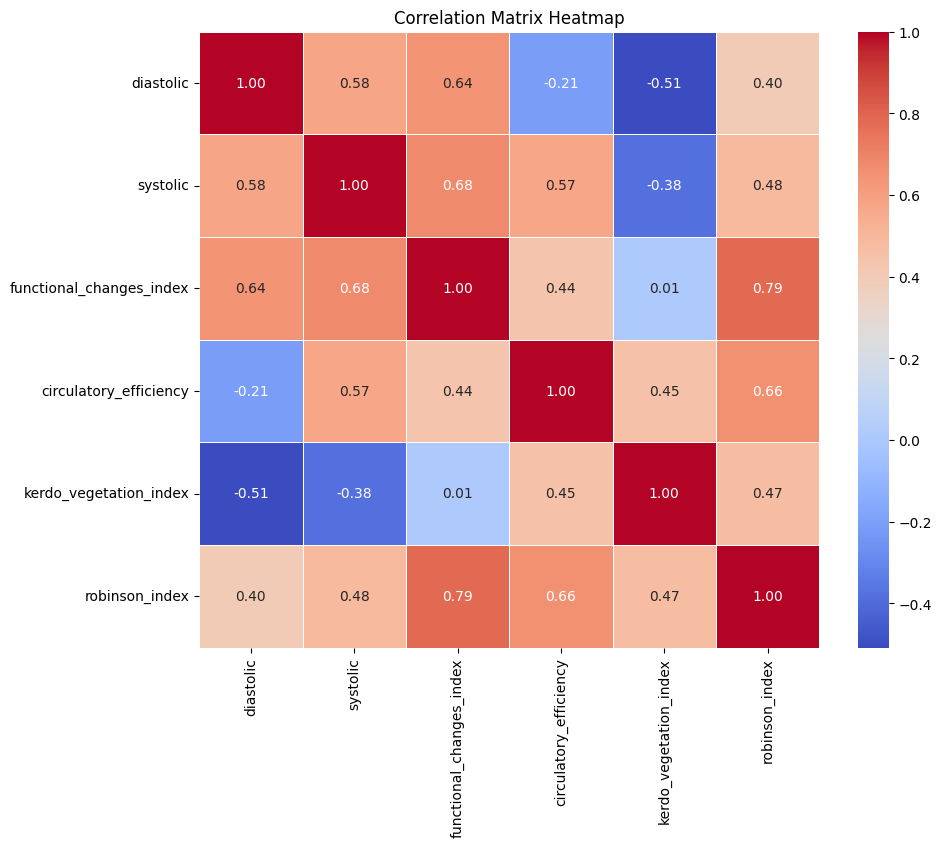


Participants' Biometrics Data: Heart Rate Variability (HRV) Measurements
----------------------
Correlation Matrix:
                  bpm    meanrr     mxdmn      sdnn     rmssd     pnn50  \
bpm          1.000000 -0.977724 -0.343935 -0.341514 -0.214339 -0.408006   
meanrr      -0.977724  1.000000  0.348015  0.348052  0.231696  0.445640   
mxdmn       -0.343935  0.348015  1.000000  0.954639  0.846259  0.777242   
sdnn        -0.341514  0.348052  0.954639  1.000000  0.909046  0.810236   
rmssd       -0.214339  0.231696  0.846259  0.909046  1.000000  0.843065   
pnn50       -0.408006  0.445640  0.777242  0.810236  0.843065  1.000000   
mode        -0.956984  0.979400  0.262628  0.258114  0.128843  0.361014   
amo          0.547373 -0.533668 -0.750213 -0.759049 -0.595028 -0.718982   
lf          -0.171505  0.176511  0.717783  0.743380  0.629966  0.558850   
hf          -0.105204  0.128630  0.740832  0.773958  0.857374  0.727759   
vlf         -0.240630  0.242066  0.491447  0.489891  0.274

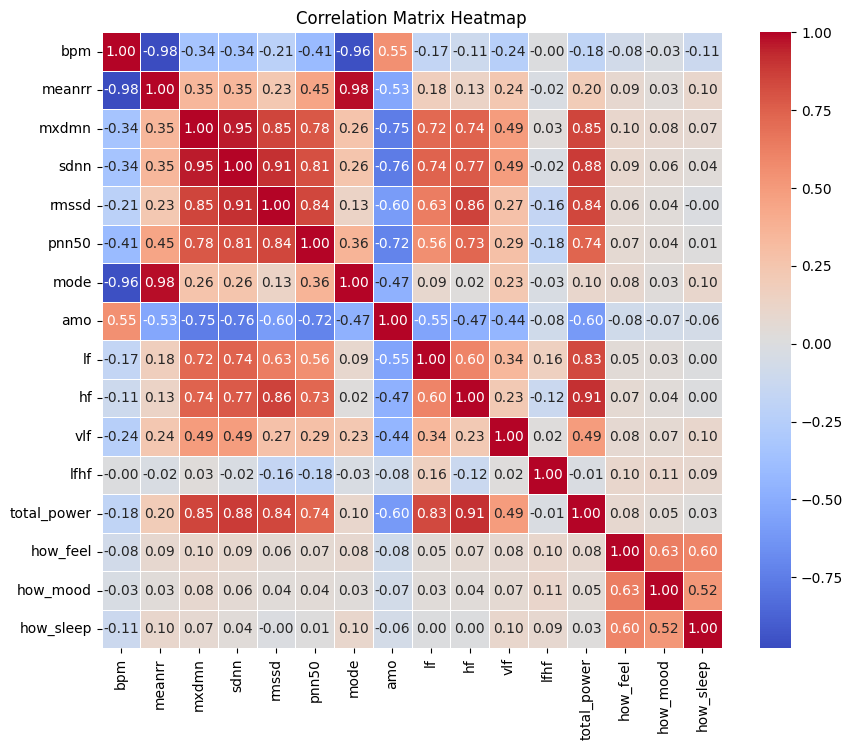


Participants' Biometrics Data: Sleep Data
----------------------
Correlation Matrix:
                      sleep_duration  sleep_awake_duration  \
sleep_duration              1.000000             -0.176436   
sleep_awake_duration       -0.176436              1.000000   
sleep_rem_duration          0.962985             -0.382577   
sleep_light_duration        0.409195              0.466358   
sleep_deep_duration         0.551536              0.283719   
pulse_min                   0.286882             -0.937728   
pulse_max                   0.542304             -0.999860   
pulse_average               0.243608             -0.935125   

                      sleep_rem_duration  sleep_light_duration  \
sleep_duration                  0.962985              0.409195   
sleep_awake_duration           -0.382577              0.466358   
sleep_rem_duration              1.000000              0.754172   
sleep_light_duration            0.754172              1.000000   
sleep_deep_duration      

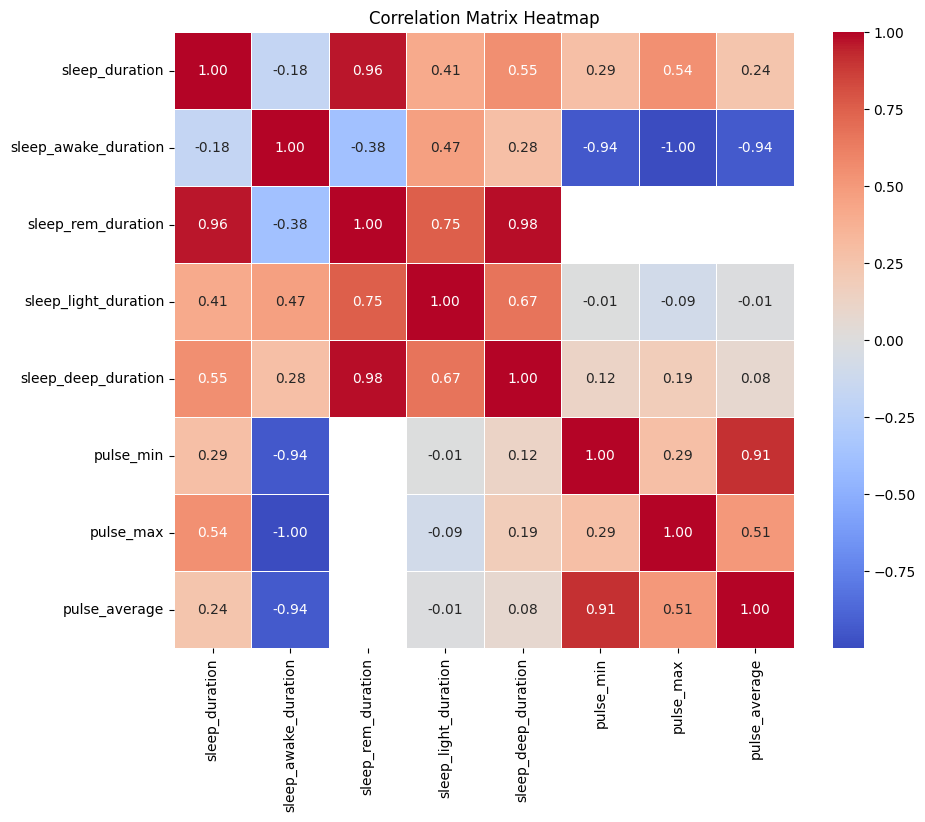


Participants' Biometrics Data: Wearables Data
----------------------
Correlation Matrix:
                                 resting_pulse  pulse_average  pulse_min  \
resting_pulse                         1.000000       0.338089   0.840694   
pulse_average                         0.338089       1.000000   0.315410   
pulse_min                             0.840694       0.315410   1.000000   
pulse_max                            -0.227967       0.663218  -0.328660   
average_spo2_value                    0.235886      -0.056980   0.127899   
body_temperature_avg                 -0.156849      -0.027397   0.027742   
stand_hours_total                    -0.078295       0.196996  -0.133089   
steps_count                          -0.122994       0.130591  -0.120087   
distance                             -0.159283       0.134463  -0.194156   
steps_speed                           0.125197      -0.010898   0.042564   
total_number_of_flights_climbed      -0.292782      -0.069213  -0.280784  

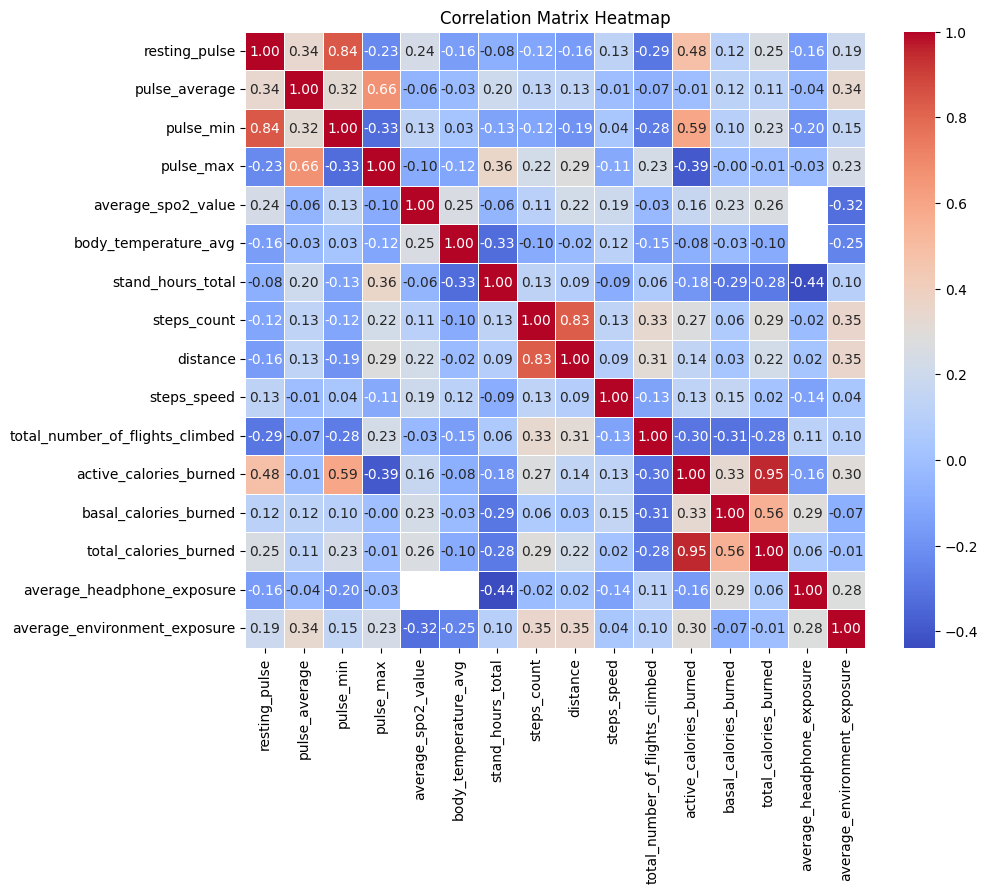


Weather Condition Data for Participants' Locations
----------------------
Correlation Matrix:
                      avg_temperature_C  atmospheric_pressure  \
avg_temperature_C              1.000000             -0.002708   
atmospheric_pressure          -0.002708              1.000000   
precip_intensity               0.030620             -0.145488   
humidity                      -0.449895             -0.112873   
clouds                        -0.155868             -0.288340   

                      precip_intensity  humidity    clouds  
avg_temperature_C             0.030620 -0.449895 -0.155868  
atmospheric_pressure         -0.145488 -0.112873 -0.288340  
precip_intensity              1.000000  0.230269  0.209718  
humidity                      0.230269  1.000000  0.399211  
clouds                        0.209718  0.399211  1.000000  


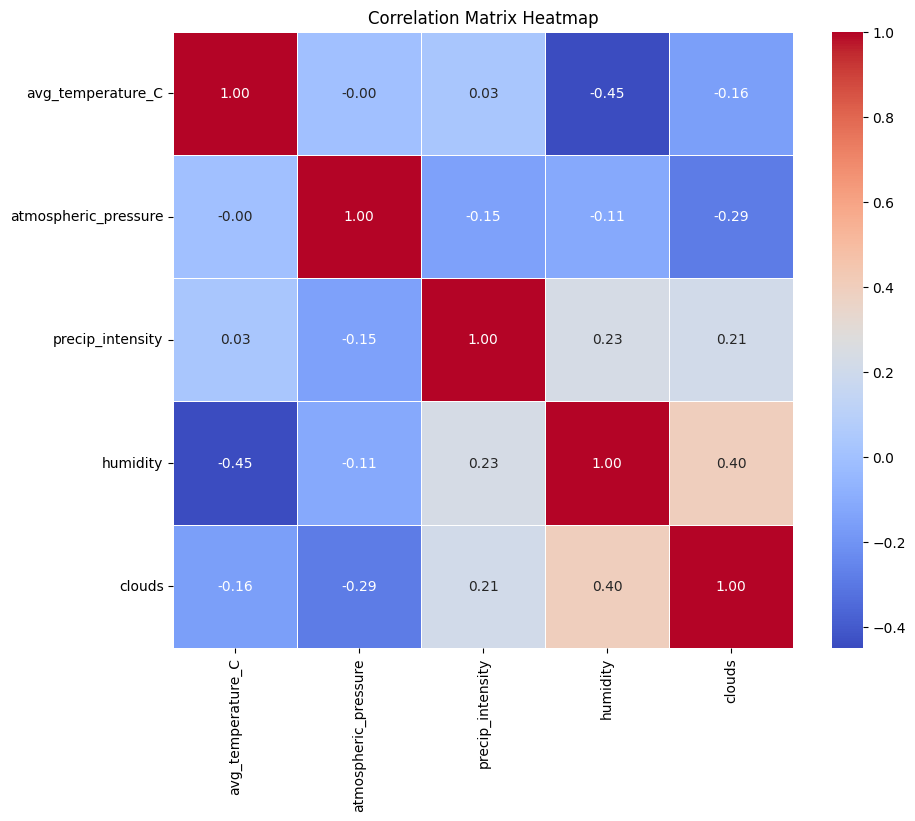

In [27]:
# Variable Relationships
print("\nVariable Relationships")
print("----------------------")

print("\nParticipants' Biometrics Data: Blood Pressure")
print("----------------------")
print("Correlation Matrix:")
correlation_matrix2 = df_blood_pressure[numeric_columns2].corr()
print(correlation_matrix2)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix2, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

print("\nParticipants' Biometrics Data: Heart Rate Variability (HRV) Measurements")
print("----------------------")
print("Correlation Matrix:")
correlation_matrix4 = df_hrv_measurements[numeric_columns4].corr()
print(correlation_matrix4)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix4, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

print("\nParticipants' Biometrics Data: Sleep Data")
print("----------------------")
print("Correlation Matrix:")
correlation_matrix5 = df_sleep[numeric_columns5].corr()
print(correlation_matrix5)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix5, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

print("\nParticipants' Biometrics Data: Wearables Data")
print("----------------------")
print("Correlation Matrix:")
correlation_matrix6 = df_wearables[numeric_columns6].corr()
print(correlation_matrix6)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix6, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

print("\nWeather Condition Data for Participants' Locations")
print("----------------------")
print("Correlation Matrix:")
correlation_matrix7 = df_weather[numeric_columns7].corr()
print(correlation_matrix7)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix7, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

Interpretation of Variable Relationships

Blood Pressure: 
Quite high positive correlation (0.79) between functional_changes_index and robinson_index

HRV Measurements: 
High positive correlation (>=0.80) between
mxdmn <> sdnn, rmssd, total_power
sdnn <> rmssd, pnn50, total_power
rmssd <> pnn50, hf, total_power
mode <> meanrr
lf <> total_power
hf <> total_power

High negative correlation (<=-0.80) between
bpm <> meanrr, mode

Sleep Data: 
High positive correlation (>=0.80) between
sleep_duration <> sleep_rem_duration
sleep_rem_duration <> sleep_deep_duration
pulse_min <> pulse_average

High negative correlation (<=-0.80) between
sleep_awake_duration <> pulse_min, pulse_average

Wearables Data: 
High positive correlation (>=0.80) between
resting_pulse <> pulse_min
steps_counnt <> distance
active_calories_burned <> total_calories_burned

Weather Data: 
No significant correlation in weather variables.

Those variable pairs with high positive correlation suggests that as one variable in the pair increases, another should also tend to increase.
In contrast, variable pairs with high negative correlation suggests that as one variable in the pair increases, another tends to decrease.

3. Explore data visually with appropriate visualizations

4. Discuss and implement strategies for Handling Missing Values, Removing Duplicates, and Handling Outliers

5. Perform data transformation as appropriate

6. Create at least one new feature and document your approach

In [ ]:
# Feature Engineering
print("\nFeature Engineering")
print("-------------------")
# df['sepal_area'] = df['sepal length (cm)'] * df['sepal width (cm)']
# df['petal_area'] = df['petal length (cm)'] * df['petal width (cm)']
# print(f"New Features: {df.columns}")

# Visualize new features
# sns.pairplot(df, hue='species', vars=['sepal_area', 'petal_area'])
# plt.show()

7. Perform a dimensionality reduction method on the data and discuss 

8. Include a discussion around data quality assessment, including data profiling, data completeness, data accuracy, data consistency, data integrity, and data lineage and provenance